Initial Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

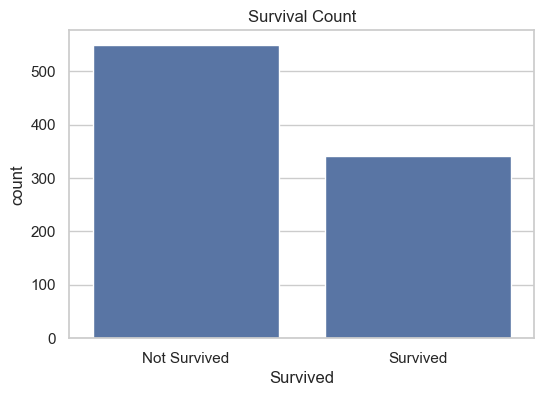

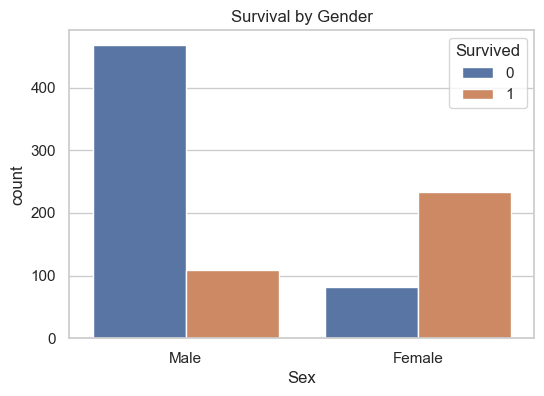

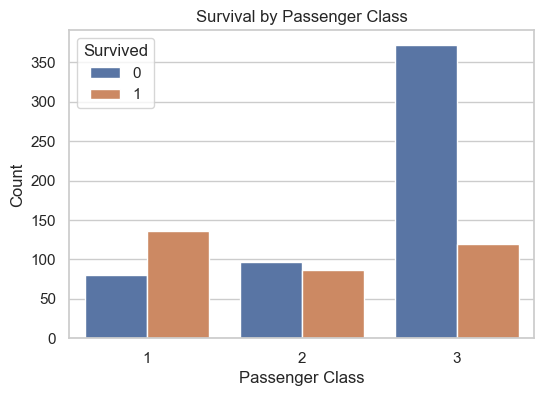

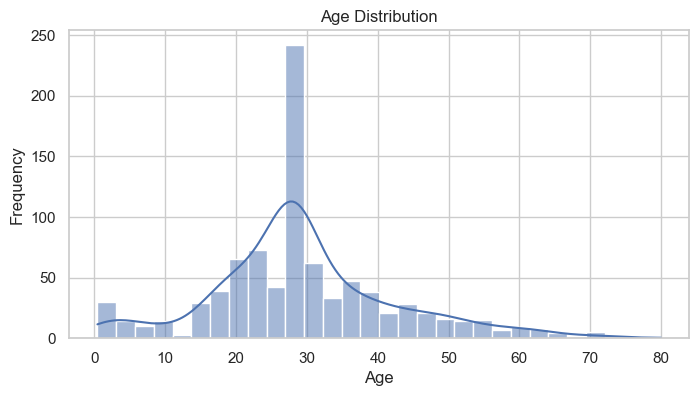

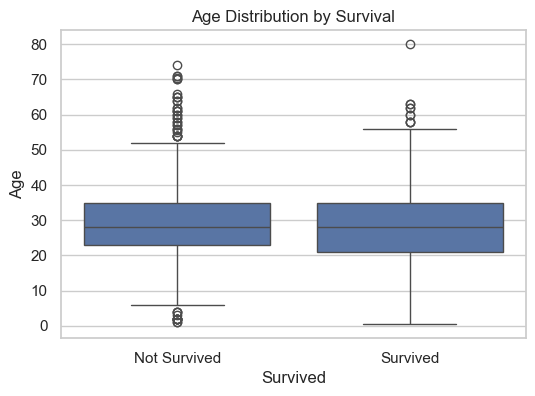

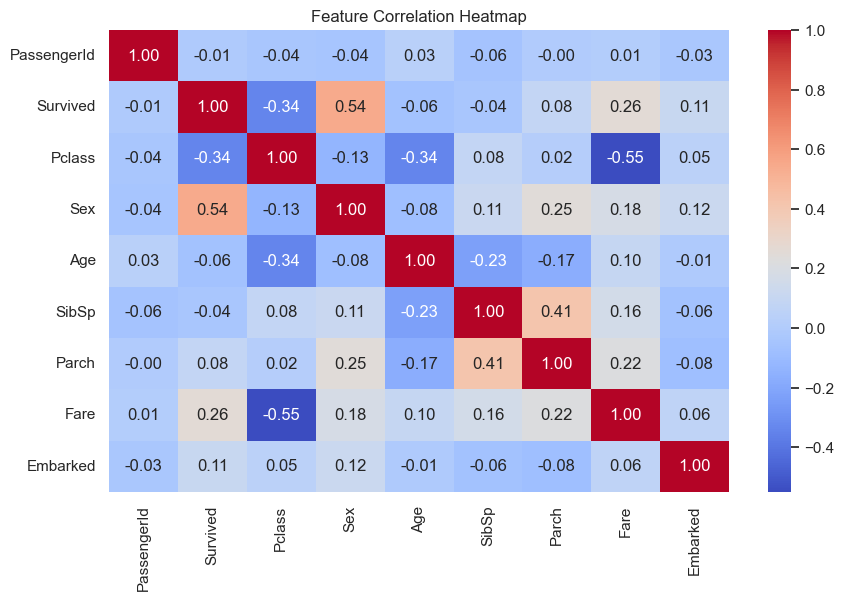


🔍 Insights Summary:
- 🚺 Women had significantly higher survival rates than men.
- 🎩 First class passengers were more likely to survive than second or third class.
- 👶 Younger passengers had a better chance of survival.
- 🌍 Embarked location had a minor influence on survival compared to other factors.


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first few rows
print("Initial Data Preview:")
print(df.head())

# ----------------------
# Data Cleaning
# ----------------------

# Check missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill missing values in 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' due to too many missing values
df = df.drop(columns=['Cabin'])

# Drop columns not needed for analysis
df = df.drop(columns=['Ticket', 'Name'])

# Confirm missing values have been handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# ----------------------
# Feature Encoding
# ----------------------

# Encode 'Sex' and 'Embarked' as numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# ----------------------
# Exploratory Data Analysis (EDA)
# ----------------------

# Set style for plots
sns.set(style='whitegrid')

# Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Survival by Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age vs Survival
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# ----------------------
# Insights Summary
# ----------------------

print("\n🔍 Insights Summary:")
print("- 🚺 Women had significantly higher survival rates than men.")
print("- 🎩 First class passengers were more likely to survive than second or third class.")
print("- 👶 Younger passengers had a better chance of survival.")
print("- 🌍 Embarked location had a minor influence on survival compared to other factors.")
